In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [48]:
data = np.random.rand(7, 8, 3)
data.shape

# data = np.arange(7*8*3)
# data = data.reshape(7, 8, 3)

(7, 8, 3)

In [61]:
data2 = np.random.rand(7, 3, 1)
data2.shape

# data2 = np.arange(7*8*1)
# data2 = data2.reshape(7, 8, 1)

(7, 3, 1)

In [62]:
lista_vectores = data - np.min(data)
lista_vectores = lista_vectores / lista_vectores.max()
# lista_vectores = lista_vectores/2

lista_vectores_i = data2 - np.min(data2)
lista_vectores_i = lista_vectores_i / lista_vectores_i.max()
# lista_vectores_i = lista_vectores_i/2

/tmp/ipykernel_42642/2410626551.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '5', '10', '15', '20', '25'])


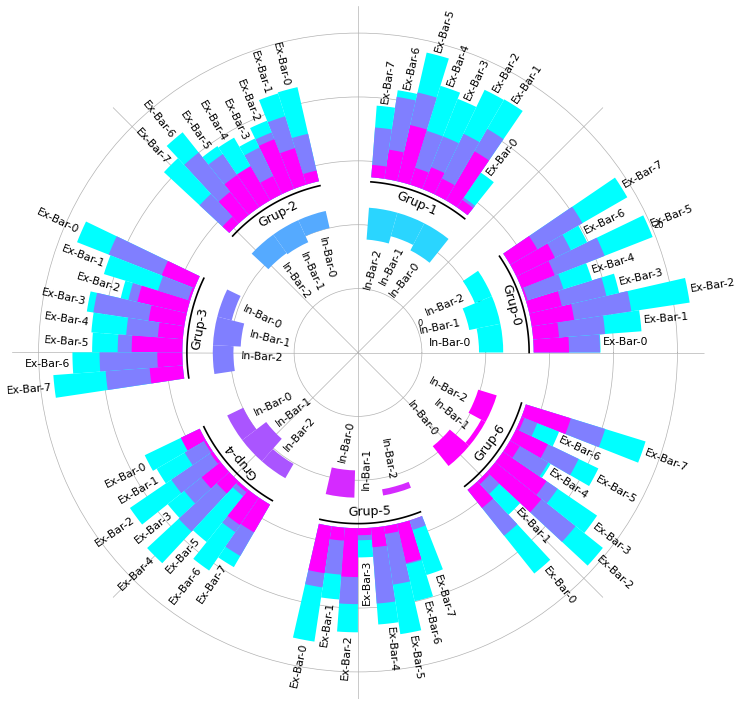

In [63]:
lista_vectores = data - np.min(data)
lista_vectores = lista_vectores / np.sum(lista_vectores, axis=2).max()
# lista_vectores = lista_vectores/2

lista_vectores_i = data2 - np.min(data2)
lista_vectores_i = lista_vectores_i / lista_vectores_i.max()
# lista_vectores_i = lista_vectores_i/2


labels = [f'Grup-{i}' for i in range(7)]
labels2 = [f'Ex-Bar-{i}' for i in range(8)]
labels3 = [f'In-Bar-{i}' for i in range(8)]

limits = [0.4, 0.5]

lista_vectores = lista_vectores * (1 - limits[1])
lista_vectores_i = lista_vectores_i * (limits[1] - limits[0])

theta_inicio = 0
theta_inicio2 = 0


cmap1 = [
    'cool',
]
cmap2 = [
    'cool',
        ]



space = 0.1
espacio_entre_grupos = 0.3 
espacio_entre_grupos2 = 0.3


plt.figure(figsize=(15, 15), dpi=60)
ax = plt.subplot(111, projection= 'polar')



colores_cualitativos = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                            'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 
                            'tab20', 'tab20b', 'tab20c']

ancho_por_barra = (2 * np.pi - espacio_entre_grupos * len(lista_vectores)) / sum(len(v) for v in lista_vectores)


cmap1 = np.array(cmap1)

for j, vectores in enumerate(lista_vectores):
    
    ancho_grupo = ancho_por_barra * len(vectores)
    theta = np.linspace(theta_inicio, theta_inicio + ancho_grupo, len(vectores), endpoint=False)

    
    cmap1_ = matplotlib.colormaps.get_cmap(cmap1[0])
    cmap1 = np.roll(cmap1, 1)

    if cmap1_.name in colores_cualitativos:
        colores = cmap1_(range(len(vectores[0])))[::-1]
        
    else:
        if len(vectores[0]) == 1:
            colores = cmap1_(np.linspace(0, 1, len(vectores[0])))   
        else:
            colores = cmap1_(np.linspace(0, 1, len(vectores[0])))

    for i, v in enumerate(vectores): 
        if len(v) == 1:
            colores = cmap1_(np.linspace(0, 1, len(lista_vectores)))[j] 
        barras_externas = plt.bar(theta[i], np.cumsum(v)[::-1], color=colores, align='edge', width=ancho_por_barra*(1), bottom=limits[1]*(1 + space))


        rot = theta[i].mean()*(180/np.pi)
        if 270 > rot > 90:
            rot = rot -180
        plt.text(theta[i] + ancho_por_barra/2, limits[1] + v.sum() + space*1.3, labels2[i], fontdict={'fontsize':13}, rotation=rot, horizontalalignment='center', verticalalignment='center')


    plt.plot(np.linspace(theta[0], theta[-1]+ancho_por_barra, 100), np.ones(100) * limits[1]/(1-space/1.5), color='k', linewidth=2)
    theta_inicio += ancho_grupo + espacio_entre_grupos


    rot = theta.mean()*(180/np.pi) - 90
    if rot > 180:
        rot = rot -180
    plt.text(np.mean([theta[0], theta[-1]+ancho_por_barra]), limits[1], labels[j], fontdict={'fontsize':15}, rotation=rot, horizontalalignment='center', verticalalignment='center')


ancho_por_barra = (2 * np.pi - espacio_entre_grupos2 * len(lista_vectores_i)) / sum(len(v) for v in lista_vectores_i)


for j, vectores in enumerate(lista_vectores_i):
    
    ancho_grupo = ancho_por_barra * len(vectores)
    theta = np.linspace(theta_inicio2, theta_inicio2 + ancho_grupo, len(vectores), endpoint=False)

    
    cmap2_ = matplotlib.colormaps.get_cmap(cmap2[0])
    cmap2 = np.roll(cmap2, 1)

    if cmap1_.name in colores_cualitativos:
        colores = cmap2_(range(len(vectores[0])))[::-1]
        
    else:
        if len(vectores[0]) == 1:
            colores = cmap2_(np.linspace(0, 1, len(vectores[0])))   
        else:
            colores = cmap2_(np.linspace(0, 1, len(vectores[0])))

    for i, v in enumerate(vectores): 
        if len(v) == 1:
            colores = cmap2_(np.linspace(0, 1, len(lista_vectores_i)))[j] 
        barras_internas = plt.bar(theta[i], np.cumsum(v)[::-1], color=colores, align='edge', width=ancho_por_barra*(1), bottom= limits[1]/(1 + space) - v)


        rot = theta[i].mean()*(180/np.pi) % 360
        if 270 > rot > 90:
            rot = rot - 180
        plt.text(theta[i] + ancho_por_barra/2, limits[0] - v.sum() - (space/3), labels3[i], fontdict={'fontsize':13}, rotation=rot, horizontalalignment='center', verticalalignment='center')

    theta_inicio2 += ancho_grupo + espacio_entre_grupos


    
for spine in ax.spines.values():
    spine.set_visible(False)
# ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)



ax.tick_params(axis='x', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax.set_yticklabels(['0', '5', '10', '15', '20', '25'])

    
ax.set_axisbelow(True)
plt.grid(True)

# return ax